Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. 

Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.


Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

`лог сервера с данными о посещениях сайта Яндекс.Афиши,`

`выгрузка всех заказов за этот период,`

`статистика рекламных расходов.`

Вам предстоит изучить:

`как клиенты пользуются сервисом,`

`когда делают первые покупки на сайте,`

`сколько денег приносит компании каждый клиент,`

`когда расходы на привлечение клиента окупаются.`

Выручка измеряется в условных единицах — у.е.

Цель проекта:
`Определить источники трафика, на которые маркетологам стоит делать упор и определить самые перспективные для компании когорты клиентов.`

### Шаг 1. Загрузка файла с данными и изучение общей информации. 

In [70]:
# загрузка нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [71]:
# загрузка данных,
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [72]:
for df in [(visits,'visits_log'), (orders, 'orders_log'), (costs, 'costs')]:
    display('_________________________________________________')
    display('_________________________________________________')
    display(df[1])
    display(df[0].info(), df[0].head(10),
            pd.DataFrame(round((df[0].isna().mean() *100),2)).style.background_gradient(cmap='coolwarm'))
    print('Количество дубликатов:', df[0].duplicated().sum())
    
# Посмотрим на общую информацию и на процентное содержание пропусков.

'_________________________________________________'

'_________________________________________________'

'visits_log'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,0
Device,0
End Ts,0
Source Id,0
Start Ts,0
Uid,0


Количество дубликатов: 0


'_________________________________________________'

'_________________________________________________'

'orders_log'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,0
Buy Ts,0
Revenue,0
Uid,0


Количество дубликатов: 0


'_________________________________________________'

'_________________________________________________'

'costs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


,0
source_id,0
dt,0
costs,0


Количество дубликатов: 0


__Вывод__

Каждая строка таблицы содержит различную информацию о визитах, заказах и рекламных расходах. Пропусков нет. Приведем все названия столбцов к нижнему регистру и названия из двух слов соеденим "_".

В таблице visits переведем столбец Start Ts, End Ts в datetime

В таблице orders_log переведем столбец Buy Ts в datetime

В таблице costs переведем столбец DT в datetime


### Шаг 2. Предобработка данных

Приведем все названия столбцов к нижнему регистру и названия из двух слов соеденим "_".

In [73]:
for i in [visits, orders, costs]:
    i.columns = i.columns.str.lower() # Нижний регистр
    i.columns = i.columns.str.replace(" ", "_") # Названия через "_"
    display(i.head(1))

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


,source_id,dt,costs
0,1,2017-06-01,75.2


Перевод в datetime

In [74]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%dT%H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%dT%H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%dT%H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [75]:
for df in [(visits,'visits_log'), (orders, 'orders_log'), (costs, 'costs')]: # Проверка
    display('_________________________________________________')
    display('_________________________________________________')
    display(df[1])
    display(df[0].info())

'_________________________________________________'

'_________________________________________________'

'visits_log'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

'_________________________________________________'

'_________________________________________________'

'orders_log'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

'_________________________________________________'

'_________________________________________________'

'costs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

### Рассчет метрик и построение графиков

#### Продуктовые метрики

__Рассчитайте DAU, WAU и MAU__

Чтобы посчитать недельное, месячное и годовое использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [76]:
visits['start_ts_day'] = visits['start_ts'].dt.date
visits['start_ts_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_ts_month'] = visits['start_ts'].astype('datetime64[M]')
visits['start_ts_year'] = visits['start_ts'].dt.year


visits['end_ts_day'] = visits['end_ts'].dt.date
#visits['end_ts_week'] = visits['end_ts'].dt.week
#visits['end_ts_month'] = visits['end_ts'].dt.month
#visits['end_ts_year'] = visits['end_time'].dt.end_ts

__Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее:__

In [77]:
dau = visits.groupby(['start_ts_day']).agg({'uid':'nunique'})
wau = visits.groupby(['start_ts_year', 'start_ts_week']).agg({'uid':'nunique'})
mau = visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid':'nunique'})

print('Количество уникальных пользователей в день:', dau.mean().astype('int'))
print('Количество уникальных пользователей в неделю:', wau.mean().astype('int'))
print('Количество уникальных пользователей в месяц:', mau.mean().astype('int'))

Количество уникальных пользователей в день: uid    907
dtype: int64
Количество уникальных пользователей в неделю: uid    5621
dtype: int64
Количество уникальных пользователей в месяц: uid    23228
dtype: int64


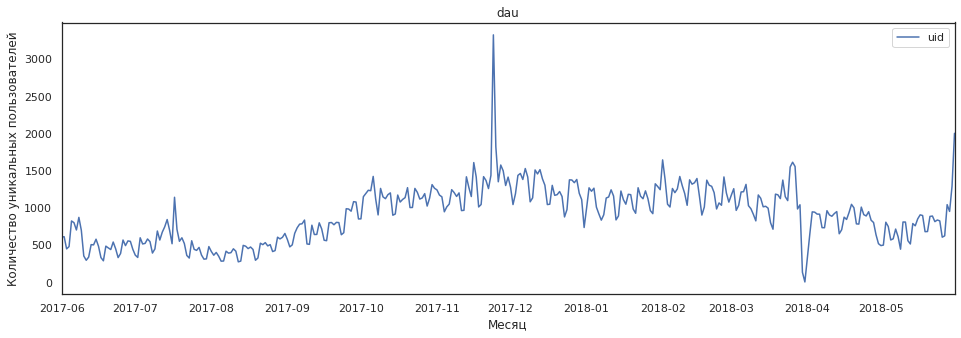

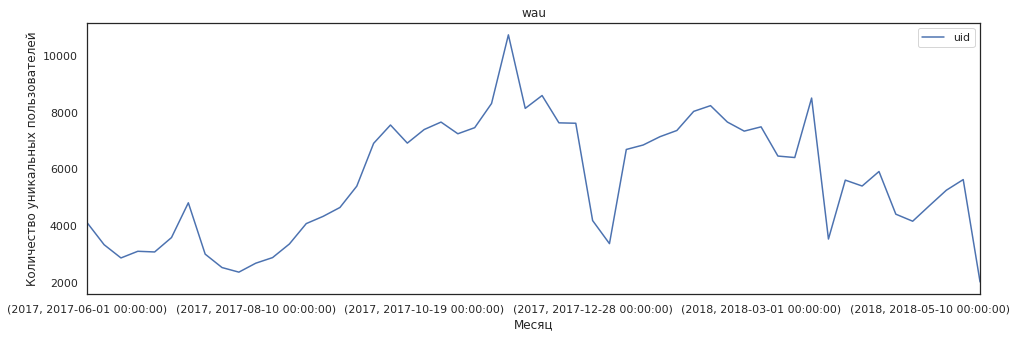

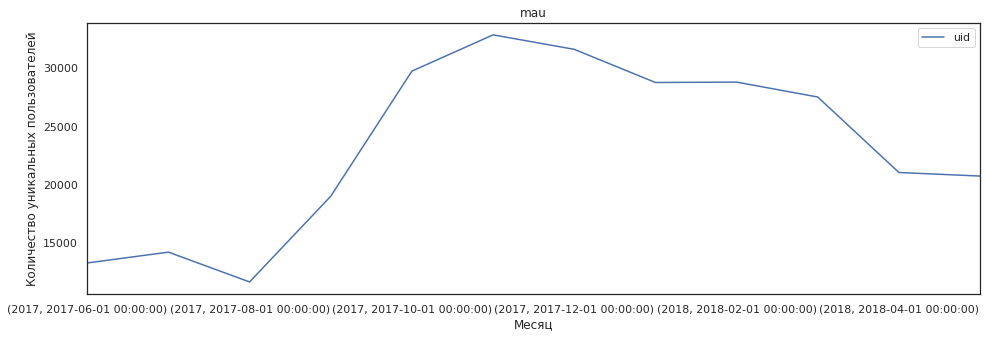

In [78]:
coll = [(dau,'dau'), (wau, 'wau'), (mau, 'mau')]
for i in coll: # Подставляет в цикл список нужных нам для анализа таблиц
    i[0].plot(figsize=(16, 5))
    plt.title('{}'.format(i[1]))
    plt.xlabel('Месяц')
    plt.ylabel("Количество уникальных пользователей")
    plt.show()

По графику dau можно заметить, что количество уникальных пользователей в день все время примерно на одном уровне, исключая резкий подьем в конце 2017-11 и спад в 04-2018

По графику wau можно заметить, что количество уникальных пользователей в неделю все время разное. Виден пик пользователй в 2017-11 и спад до уровня 2017-08 в 2017-12

По графику mau можно заметить, что количество уникальных пользователей в месяц вырасло с 2017-08 и достигло своего пика количества пользователей в 2017-11 (больше 30 тыс. человек) , далее график корректировался до 23 тысю пользователй в месяц

__Сколько раз за день пользователи в среднем заходят на сайт__

In [79]:
visits_in_day = visits.groupby(['start_ts_day']).agg({'uid':'count'})
print('В среднем пользователи заходят на сайт', int(visits_in_day.mean()))

В среднем пользователи заходят на сайт 987


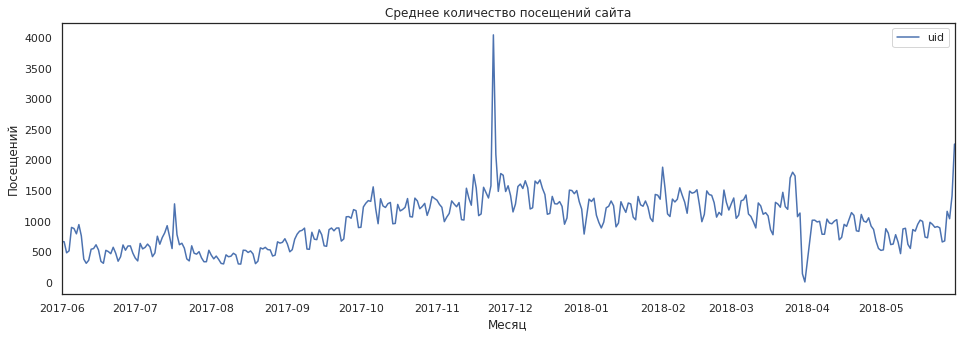

In [80]:
visits_in_day.plot(figsize=(16, 5))
plt.title('Среднее количество посещений сайта')
plt.ylabel('Посещений')
plt.xlabel('Месяц')
plt.show()

По графику можем заметить, что в среднем пользователи заходят на сайт 900 - 1300 раз

In [81]:
visits_in_day = visits.groupby(['start_ts_day']).agg({'uid':['count', 'nunique']}).reset_index()
visits_in_day.columns = ['visits_month', 'count_visits', 'nunique_visits']
visits_in_day

,visits_month,count_visits,nunique_visits
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820
...,...,...,...
359,2018-05-27,672,620
360,2018-05-28,1156,1039
361,2018-05-29,1035,948
362,2018-05-30,1410,1289


In [82]:
visits_in_day['visits_day'] = visits_in_day['count_visits'] / visits_in_day['nunique_visits']
print('Каждый человек заходит за день в среднем:', visits_in_day['visits_day'].mean())
visits_in_day

Каждый человек заходит за день в среднем: 1.082169644003972


,visits_month,count_visits,nunique_visits,visits_day
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


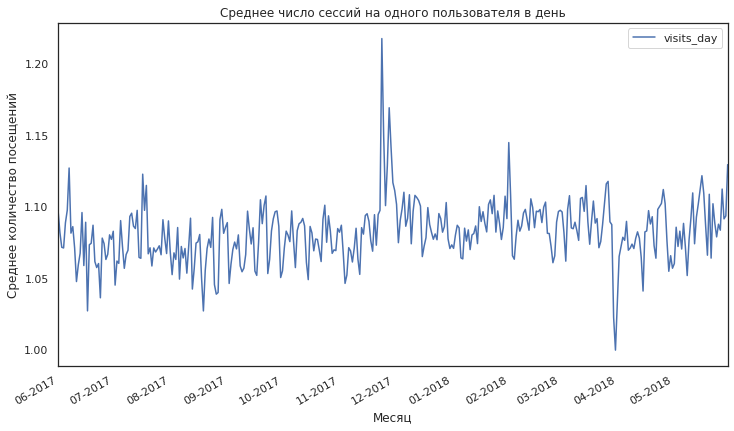

In [83]:
ax = visits_in_day.plot(figsize = (12,7), x = 'visits_month' , y = 'visits_day')
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.title('Среднее число сессий на одного пользователя в день')
plt.ylabel('Среднее количество посещений')
plt.xlabel('Месяц')
plt.show()

По графику можно заметить, что в среднем пользователь заходит 1.05-1.1 раз в день. 

Пик количества сессий был 12-2017, а спад 04-2018. 

Также заметим, что пик и спад совпадают с днями минимальных и максимальных значений DAU.

__Сколько времени пользователи проводят на сайте__

In [84]:
visits['ASL'] = (    #Средняя продолжительность сессии или ASL (англ. average session length)
    visits['end_ts'] - visits['start_ts']
).dt.seconds
print('Средняя продолжительность сессии (сек.): ', visits['ASL'].mode())

Средняя продолжительность сессии (сек.):  0    60
dtype: int64


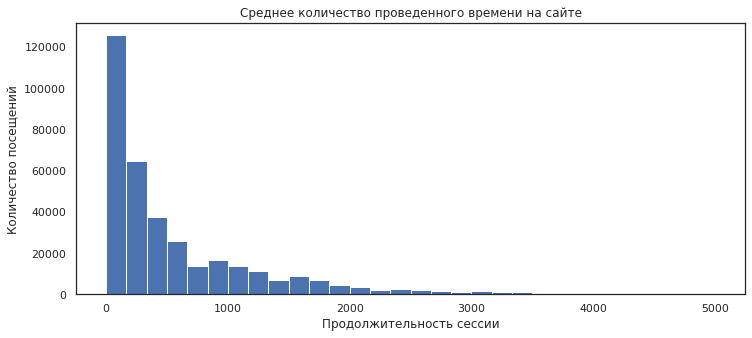

In [85]:
visits['ASL'].plot(kind = 'hist', bins = 30, figsize = (12,5), range = (0, 5000))
plt.title('Среднее количество проведенного времени на сайте')
plt.ylabel('Количество посещений')
plt.xlabel('Продолжительность сессии')
plt.show()

По графику заметим, что длина сессии распределена неравномерно, рассчитаем моду (значение в выборке, которое встречается чаще всего)

Средняя продолжительность сессии 60 сек. Сложно сразу сказать это многи или мало. Если пользователи успевают сделать заказ то все норм.

__Средний Retention Rate__

In [86]:
first_visits = visits.groupby('uid').agg({'start_ts' : 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start']
first_visits.head()

,uid,first_session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [87]:
first_visits['first_session_date'] = first_visits['first_session_start'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start'].astype('datetime64[M]')
first_visits.head()

,uid,first_session_start,first_session_date,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [88]:
first = pd.merge(first_visits, visits, on = 'uid')

In [89]:
first['age_months'] = ((first['start_ts_month'] - first['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')
first.head()

,uid,first_session_start,first_session_date,first_session_month,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,start_ts_year,end_ts_day,ASL,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-08,2018-03-01,2018,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017,2017-09-18,1080,0


In [90]:
cohorts = first.pivot_table(index='first_session_month', columns='age_months', values='uid', aggfunc='nunique')
cohorts.fillna(' ')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


Когорты 6, 11 и 12 месяцев 2017г. наиболее хорошо себя показывают на протяжении времени

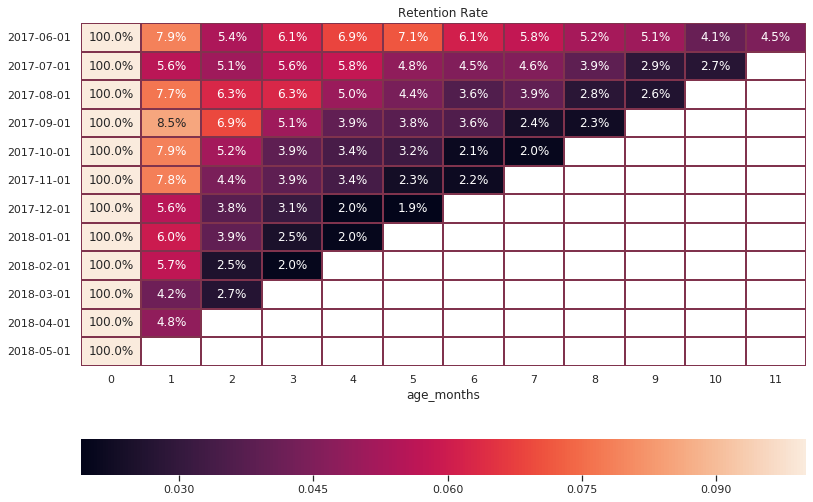

In [91]:
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col] / cohorts[0]], axis=1)
retention.columns = cohorts.columns
retention.index = [str(x)[0:10] for x in retention.index]
plt.figure(figsize = (13, 9))
sns.heatmap(retention, annot = True, fmt = '.1%' , linewidths = 1, linecolor = (0.5, 0.2, 0.3),\
            vmax = 0.1, cbar_kws = {'orientation': 'horizontal'})\
            .set(title = 'Retention Rate')
plt.show()

In [92]:
c = retention[1].median()
print('Среднее значение Retention Rate за второй месяц жизни когорт равен {:.2%}'.format(c))

Среднее значение Retention Rate за второй месяц жизни когорт равен 5.97%


Retention Rate в первые 6 месяцев держится примерно на одном уровне. С 2017-12 метрика в среднем снижалась. Если для когорты пользователей, пришедших с 1 января по 1 ноября Retention Rate в среднем составлял 7,7%, то для пользователей, пришедших с 1 декабря — уже 5,3%. Так, за 6 недель коэффициент удержания упал на 3,1%.

#### Метрики электронной коммерции

__Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.__

In [93]:
orders['buy_dt'] = orders['buy_ts'].dt.date # День заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]') # Месяц заказа

__Время первой покупки__

In [94]:
first_orders = orders.groupby('uid').agg({'buy_ts' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders.head()

,uid,first_order_ts,first_order_month,first_order_dt
0,313578113262317,2018-01-03 21:51:00,2018-01-01,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-01,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-01,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24


In [95]:
buy = pd.merge(first_visits, first_orders, on='uid')
buy.head()

,uid,first_session_start,first_session_date,first_session_month,first_order_ts,first_order_month,first_order_dt
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-01,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-01,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-01,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-01,2017-11-24


In [96]:
buy['first_order_dt'] = pd.to_datetime(buy['first_order_dt'])
buy['first_session_date'] = pd.to_datetime(buy['first_session_date'])

In [97]:
buy['min_first_buy'] = ((buy['first_order_ts'] - buy['first_session_start']) / np.timedelta64(1, 'm'))
buy.head()

,uid,first_session_start,first_session_date,first_session_month,first_order_ts,first_order_month,first_order_dt,min_first_buy
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-01,2018-01-03,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-01,2017-06-03,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-01,2017-10-11,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-01,2018-01-28,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-01,2017-11-24,0.0


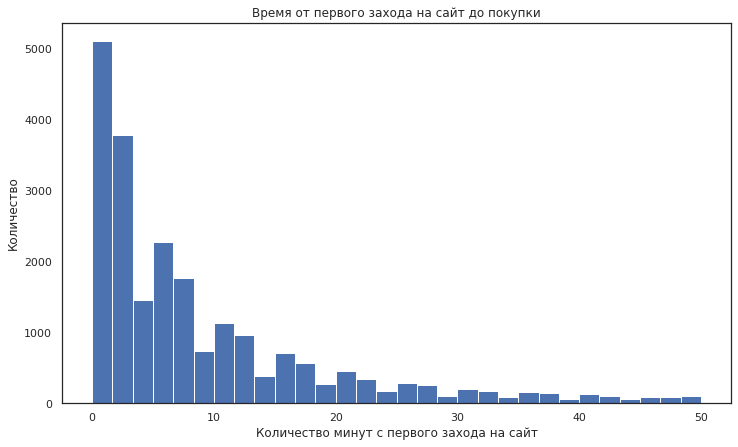

Мода от первого захода на сайт до покупки: 1 минута


In [98]:
buy['min_first_buy'].plot(kind = 'hist', bins = 30, figsize = (12,7), range = (0, 50))
plt.title('Время от первого захода на сайт до покупки')
plt.xlabel('Количество минут с первого захода на сайт')
plt.ylabel("Количество")
plt.show()
print('Мода от первого захода на сайт до покупки: {} минута'.format(int(buy['min_first_buy'].mode())))


В среднем проходит с момента первого посещения сайта до совершения покупки 1 минута.

__Среднее количество покупок на одного покупателя в месяц в течении 6 месяцев.__

Количество заказов и количество людей по 6 месяцам

In [99]:
orders_user_month = orders.groupby(['order_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_user_month.columns = ['order_month', 'count_order', 'count_user']
orders_user_month6 = orders_user_month.head(6) # За 6 месяцев

In [100]:
orders_user_month6.columns

Index(['order_month', 'count_order', 'count_user'], dtype='object')

In [101]:
orders_user_month6['order_user'] = orders_user_month6['count_order'] / orders_user_month6['count_user']
print('Каждый человек покупает за месяц в среднем', orders_user_month6['order_user'].mean())
print('Всего покупают за месяц в среднем {:.0f} раз'.format(orders.groupby('order_month').agg({'uid':'count'}).mean()[0]))

Каждый человек покупает за месяц в среднем 1.212196784778895
Всего покупают за месяц в среднем 3878 раз


In [102]:
orders_user_month6

,order_month,count_order,count_user,order_user
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759
5,2017-11-01,5659,4547,1.244557


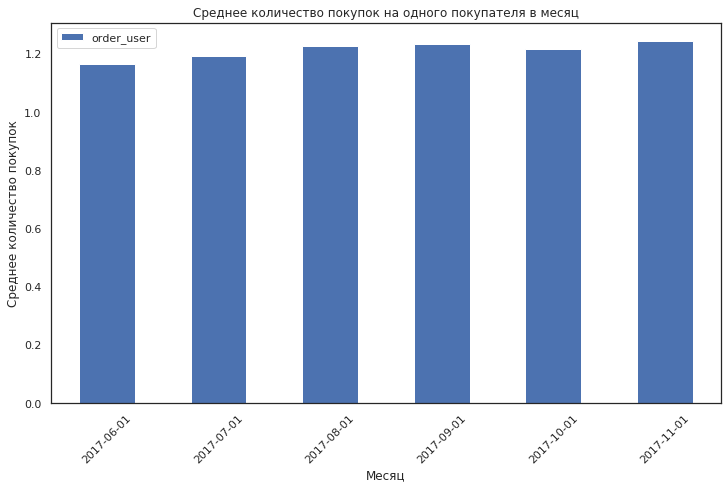

In [103]:
orders_user_month6['order_month'] = pd.to_datetime(orders_user_month6['order_month'], format='%Y-%m-%d')
orders_user_month6['order_month'] = orders_user_month6['order_month'].apply(lambda t: t.strftime('%Y-%m-%d')) # убираем время

orders_user_month6.plot(kind = 'bar', figsize = (12,7), x = 'order_month' , y = 'order_user')
plt.xticks(rotation=45)
plt.title('Среднее количество покупок на одного покупателя в месяц')
plt.xlabel('Месяц')
plt.ylabel("Среднее количество покупок")
plt.show()

Каждый человек за месяц в среднем покупает 1.2 товара. Повторные покупки есть, но они редки.

__Средний чек по месяцам__

In [104]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d')

In [105]:
date2017 = orders[orders['buy_ts'] <= '2017-12-31']
date2018 = orders[orders['buy_ts'] > '2017-12-31']

In [106]:
date2017.loc[date2017['buy_ts'].dt.month == 7]

,buy_ts,revenue,uid,buy_dt,order_month
2354,2017-07-01 00:02:00,8.55,15267325101663366816,2017-07-01,2017-07-01
2355,2017-07-01 02:06:00,4.89,4840588161370404111,2017-07-01,2017-07-01
2356,2017-07-01 05:59:00,18.33,6645567837166442471,2017-07-01,2017-07-01
2357,2017-07-01 06:46:00,1.59,13767433222793079515,2017-07-01,2017-07-01
2358,2017-07-01 07:51:00,2.44,2576016302716544399,2017-07-01,2017-07-01
...,...,...,...,...,...
4712,2017-07-31 21:51:00,19.55,4945326335356388927,2017-07-31,2017-07-01
4713,2017-07-31 21:56:00,19.55,14612840309938016936,2017-07-31,2017-07-01
4714,2017-07-31 22:15:00,0.43,7111003829622587490,2017-07-31,2017-07-01
4715,2017-07-31 22:51:00,3.05,11464612199436637011,2017-07-31,2017-07-01


In [107]:
list2017 = []
list2018 = []

for i in range(1, 13):
    c2017 = date2017.loc[date2017['buy_ts'].dt.month == i]
    cc2017 = c2017['revenue'].sum() / c2017['uid'].count()
    list2017.append(cc2017)
    
    c2018 = date2018.loc[date2018['buy_ts'].dt.month == i]
    cc2018 = c2018['revenue'].sum() / c2018['uid'].count()
    list2018.append(cc2018)
    
    display(list2018)
    #print(list2017)

[4.1129273459012925]

[4.1129273459012925, 4.840094679038061]

[4.1129273459012925, 4.840094679038061, 5.413929778445362]

[4.1129273459012925, 4.840094679038061, 5.413929778445362, 5.150644668499846]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan,
 nan]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan,
 nan,
 nan]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan,
 nan,
 nan,
 nan]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan,
 nan,
 nan,
 nan,
 nan]

[4.1129273459012925,
 4.840094679038061,
 5.413929778445362,
 5.150644668499846,
 4.771279337321675,
 3.42,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.345365853658537]

In [108]:
chek2017 = pd.DataFrame(list2017, columns=['2017'])
chek2017['month'] = ['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
chek2017

,2017,month
0,NaN,Январь
1,NaN,Февраль
2,NaN,Март
3,NaN,Апрель
4,NaN,Май
5,4.060106,Июнь
6,5.306589,Июль
7,4.847139,Август
8,5.416448,Сентябрь
9,4.928280,Октябрь


In [109]:
chek2018 = pd.DataFrame(list2018, columns=['2018'])
chek2018['month'] = ['Январь','Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
chek2018

,2018,month
0,4.112927,Январь
1,4.840095,Февраль
2,5.413930,Март
3,5.150645,Апрель
4,4.771279,Май
5,3.420000,Июнь
6,NaN,Июль
7,NaN,Август
8,NaN,Сентябрь
9,NaN,Октябрь


In [110]:
chek_mean2018 = chek2018['2018'].mean() # Средний чек в 2018
chek_mean2017 = chek2017['2017'].mean() # Средний чек в 2017
chek_mean = (chek_mean2017 + chek_mean2018) / 2 # Средний чек за все время
print('Средний чек за все время: {:.2f} у.е.'.format(chek_mean))

Средний чек за все время: 4.81 у.е.


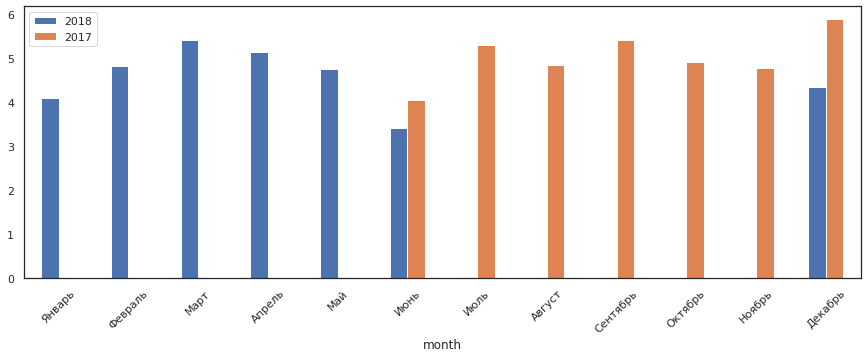

In [111]:
D = pd.merge(chek2018,chek2017,on=['month'])
D.plot(kind = 'bar', figsize=(15, 5), x = 'month')
plt.xticks(rotation=45)
plt.show()

Средний чек за все время равен 4,8

__LTV на покупателя по когортам__

In [112]:
first_orders.head()

,uid,first_order_ts,first_order_month,first_order_dt
0,313578113262317,2018-01-03 21:51:00,2018-01-01,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-01,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-01,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24


In [113]:
# Количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [114]:
# Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(orders,first_orders, on='uid')
print(orders_new.head()) 

               buy_ts  revenue                   uid      buy_dt order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

       first_order_ts first_order_month first_order_dt  
0 2017-06-01 00:10:00        2017-06-01     2017-06-01  
1 2017-06-01 00:25:00        2017-06-01     2017-06-01  
2 2017-06-01 00:27:00        2017-06-01     2017-06-01  
3 2017-06-01 00:29:00        2017-06-01     2017-06-01  
4 2017-06-01 07:58:00        2017-06-01     2017-06-01  


In [115]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
print(cohorts.head()) 

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


In [116]:
# Сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


Возраст когорты

Сделали копию, чтобы убрать в heatmap LTV время в подписи оси у

In [117]:
report1 = report.copy(deep=True)
report1['ltv'] = report1['revenue'] / report1['n_buyers']
report1['age'] = (
    report1['order_month'] - report1['first_order_month']
) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')

print(report1.head())

  first_order_month  n_buyers order_month  revenue       ltv  age
0        2017-06-01      2023  2017-06-01  9557.49  4.724414    0
1        2017-06-01      2023  2017-07-01   981.82  0.485329    1
2        2017-06-01      2023  2017-08-01   885.34  0.437637    2
3        2017-06-01      2023  2017-09-01  1931.30  0.954671    3
4        2017-06-01      2023  2017-10-01  2068.58  1.022531    4


In [118]:
report['ltv'] = report['revenue'] / report['n_buyers']
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#print(report.head()) 

Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [119]:
report1['first_order_month'] = pd.to_datetime(report['first_order_month'], format='%Y-%m-%d')
report1['first_order_month'] = report['first_order_month'].apply(lambda t: t.strftime('%Y-%m-%d')) # убираем время

In [120]:
output = report1.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1)

output.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


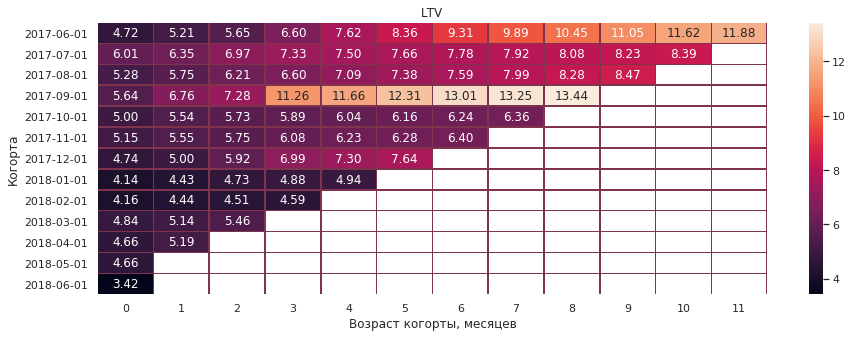

In [121]:
plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt=".2f", linewidths=.5, linecolor = (0.5, 0.2, 0.3))
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

Можем заметить высокий LTV в 1 и 9 месяцах 2017г.

In [122]:
m6_cum_ltv = output.cumsum(axis=1).mean(axis=0)[5]

print('Средний LTV за 6 месяцев после первой покупки: {:.2f} у.е'.format(m6_cum_ltv))

Средний LTV за 6 месяцев после первой покупки: 40.03 у.е


Привлечение одного покупателя в среднем обошлось компании в 40.03 у.е.

#### Маркетинговые метрики

__Общая сумма расходов на маркетинг__

In [123]:
print('Общая сумма расходов на маркетинг: {:.2f} у.е.'.format(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 329131.62 у.е.


__Распределение трат по источникам__

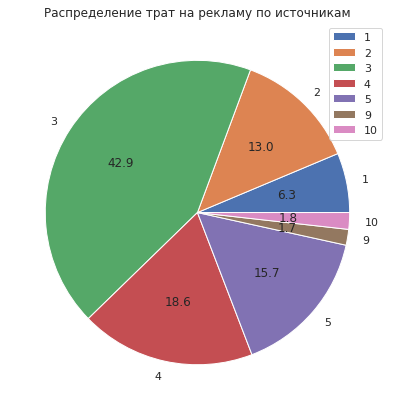

In [124]:
costs_id = costs.groupby('source_id').agg({'costs': 'sum'})
costs_id.plot(kind = 'pie', y = 'costs', figsize = (12,7), autopct='%.1f')
plt.title('Распределение трат на рекламу по источникам')
plt.ylabel("")
plt.show()

Наибольшие траты на рекламу у 3 источника (43%)

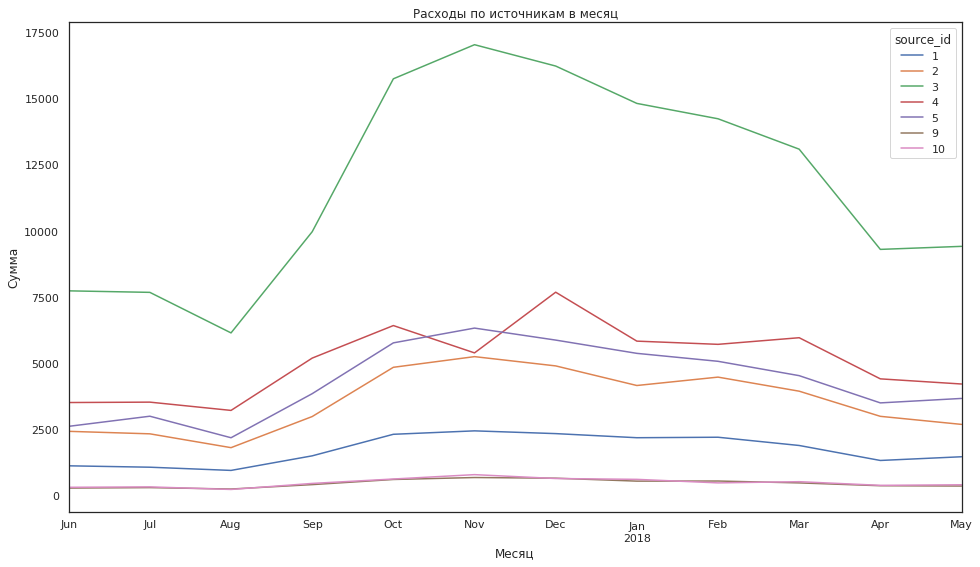

In [125]:
costs['month'] = costs['dt'].astype('datetime64[M]')

costs_dt = costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')

costs_dt.plot(kind = 'line', figsize = (16,9), title = 'Расходы по источникам в месяц')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.show()

Можем заметить, что маркетологи компании ставят акцент на источник новых клиентов №3. Расходы на источники 2, 4, 5 примерно равны (2000 - 5500). Источники 1,9,10 почти не расходуют бюджет компании.

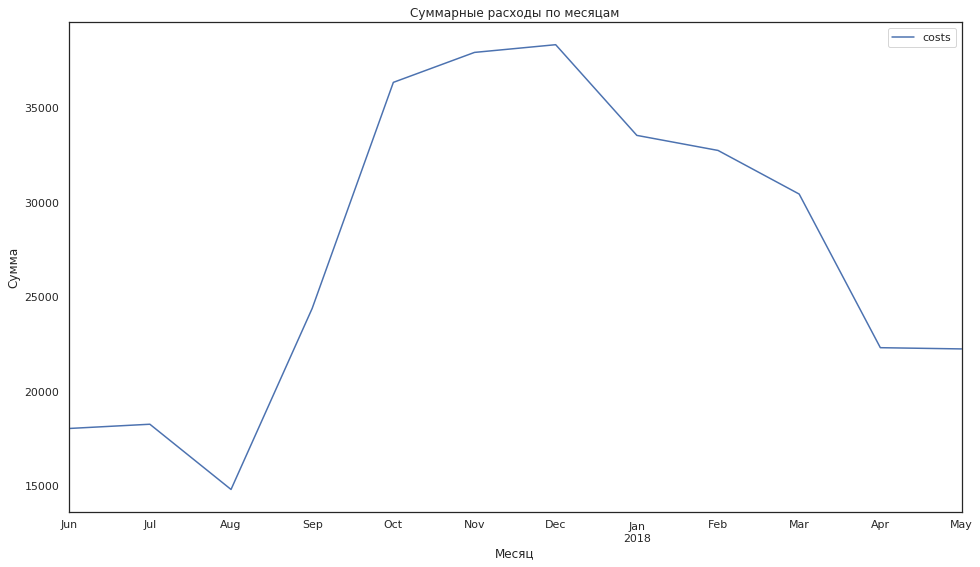

In [126]:
costs['dt'] = costs['dt'].astype('datetime64[M]')

costs.pivot_table(index = 'dt', values = 'costs', aggfunc = 'sum').plot(kind='line', title = 'Суммарные расходы по месяцам', figsize = (16,9))
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.show()

__CAC на одного покупателя для всего проекта и для каждого источника трафика__

CAC на одного покупателя для всего проекта

In [127]:
monthly_costs = costs.groupby('dt').sum()
monthly_costs.head()

,source_id,costs
dt,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [128]:
#report1['first_order_month'] = pd.to_datetime(report1['first_order_month'], format='%Y-%m-%d')
report1['first_order_month'] = report1['first_order_month'].astype('datetime64[M]')

In [129]:
report_new = pd.merge(
    report1, monthly_costs, left_on='first_order_month', right_on='dt')

report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()
display(report_new['cac'].mean())

9.319905176921116

In [130]:
report_new['cac'].value_counts()

8.905091     12
9.485486     11
10.796015    10
9.441654      9
8.369327      8
9.288870      7
8.741809      6
9.937302      5
8.962758      4
8.608907      3
9.793225      2
7.437841      1
Name: cac, dtype: int64

CAC на одного покупателя для всего проекта равен 9,31

__CAC для каждого источника трафика__

In [131]:
buy['min_first_buy'] = ((buy['first_order_ts'] - buy['first_session_start']) / np.timedelta64(1, 'D'))


In [132]:
#visits = visits[visits['uid'].isin(orders['uid'].unique())]
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buy = pd.merge(buy, users, left_on='uid', right_index = True)
buy.head()

,uid,first_session_start,first_session_date,first_session_month,first_order_ts,first_order_month,first_order_dt,min_first_buy,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-01,2018-01-03,106.959722,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-01,2017-06-03,0.000000,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-01,2017-10-11,0.054861,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-01,2018-01-28,0.822222,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-01,2017-11-24,0.000000,5


In [133]:
buy_daily = buy.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buy_daily.rename(columns = {'uid' : 'n_buy'}, inplace = True)
buy_daily['first_order_dt'] = pd.to_datetime(buy_daily['first_order_dt'])
buy_daily.head()

,source_id,first_order_dt,n_buy
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [134]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [135]:
costs_ = pd.merge(buy_daily, costs, left_on = ['source_id', 'first_order_dt'], right_on = ['source_id', 'dt'])
costs_['costs_per_buy'] = costs_['costs'] / costs_['n_buy']
costs_.head()

,source_id,first_order_dt,n_buy,dt,costs,month,costs_per_buy
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-01,14,2017-06-01,62.25,2017-06-01,4.446429
2,1,2017-06-01,14,2017-06-01,36.53,2017-06-01,2.609286
3,1,2017-06-01,14,2017-06-01,55.00,2017-06-01,3.928571
4,1,2017-06-01,14,2017-06-01,57.08,2017-06-01,4.077143


In [136]:
costs_month = costs_.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

costs_.pivot_table(index = ['month'], columns = 'source_id', values = 'costs_per_buy', aggfunc = 'mean')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,2.680024,7.355697,7.809747,11.716000,6.708000,2.376833,10.474000
2017-07-01,11.536344,37.630806,22.505484,14.232782,4.204965,NaN,NaN
2017-08-01,30.703548,58.420968,12.386169,12.973226,14.098581,NaN,7.502258
2017-09-01,10.013400,16.587000,19.536373,8.241683,9.869590,6.927000,15.355667
2017-10-01,14.940323,17.365591,21.152204,6.904129,6.001457,9.829194,20.233548
2017-11-01,6.792111,21.865333,20.268262,5.987578,6.201314,11.386333,26.412000
2017-12-01,5.394470,9.874597,13.080258,8.258570,9.970323,3.537527,10.417097
2018-01-01,8.815242,26.824129,13.269516,6.719804,6.930994,17.650323,19.817742
2018-02-01,2.714877,9.987366,5.238792,2.914265,7.244729,2.813776,1.717429


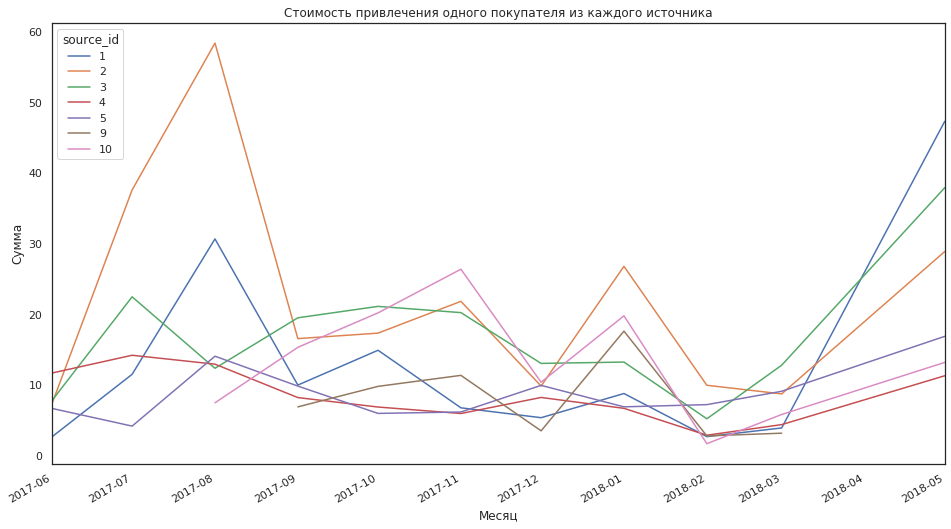

In [137]:
costs_.pivot_table(index = ['month'], columns = 'source_id', values = 'costs_per_buy', aggfunc = 'mean').plot(
    figsize = (16, 9), title = 'Стоимость привлечения одного покупателя из каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.show()

Наивысшая стоимость привлечения одного покупателя у источников 2 и 1

__ROMI по когортам в разрезе источников__

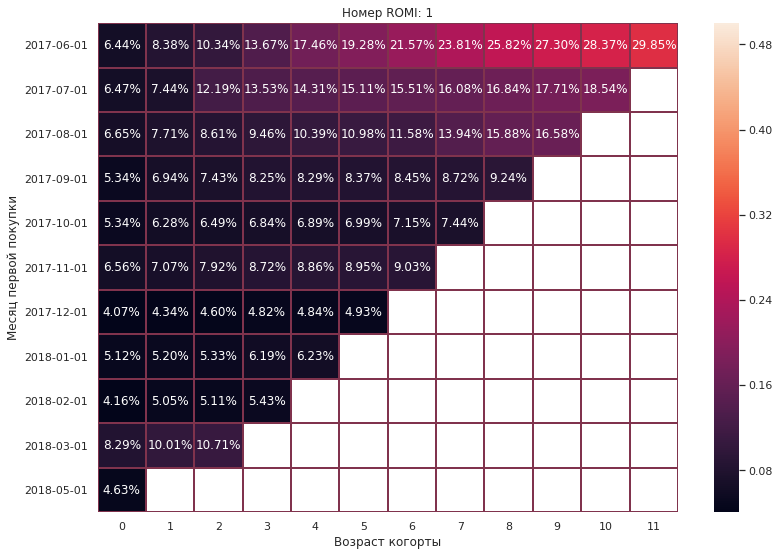

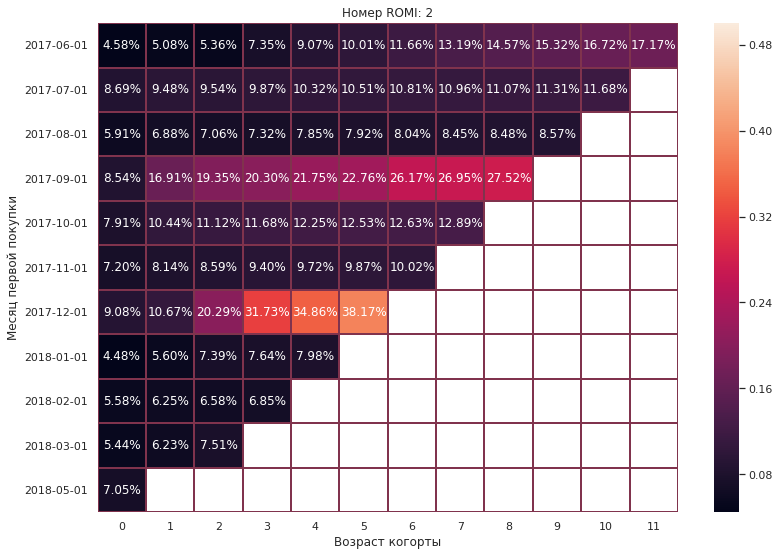

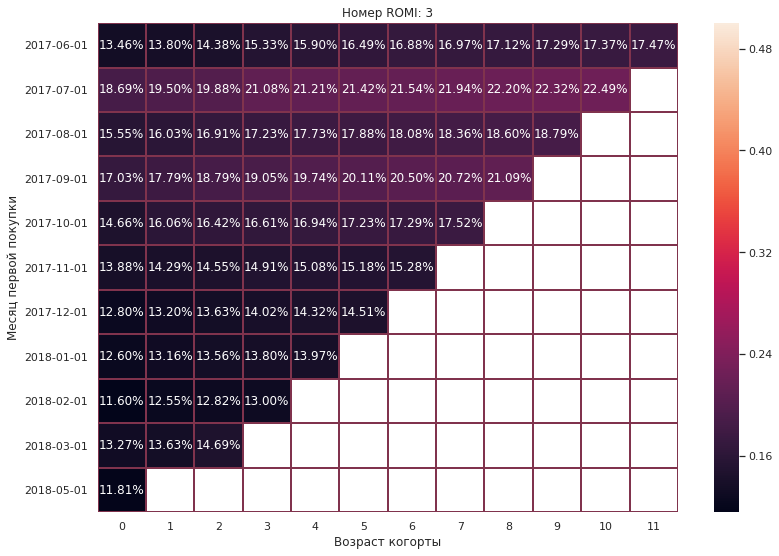

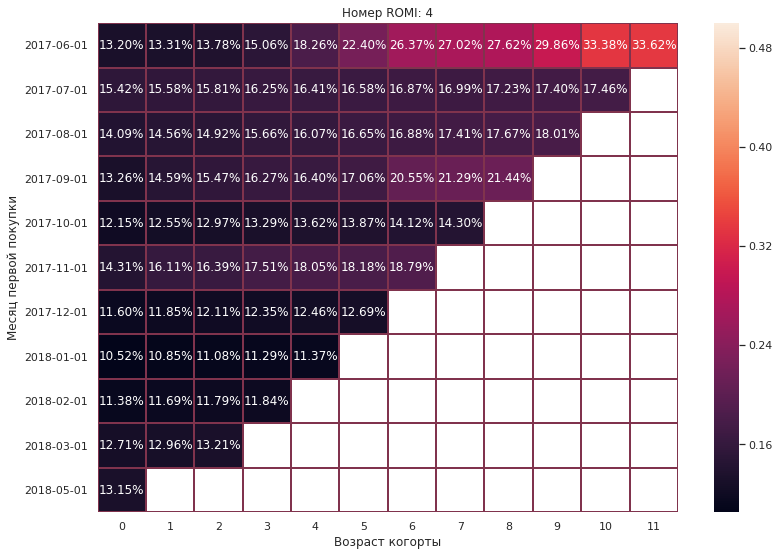

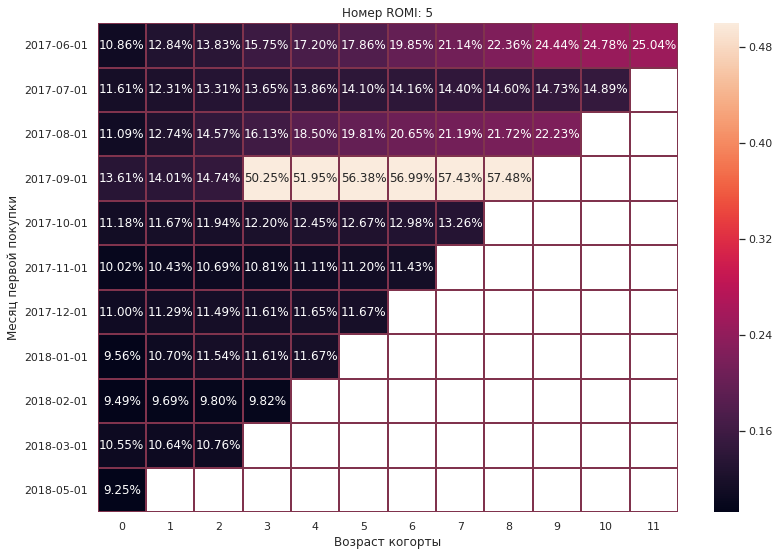

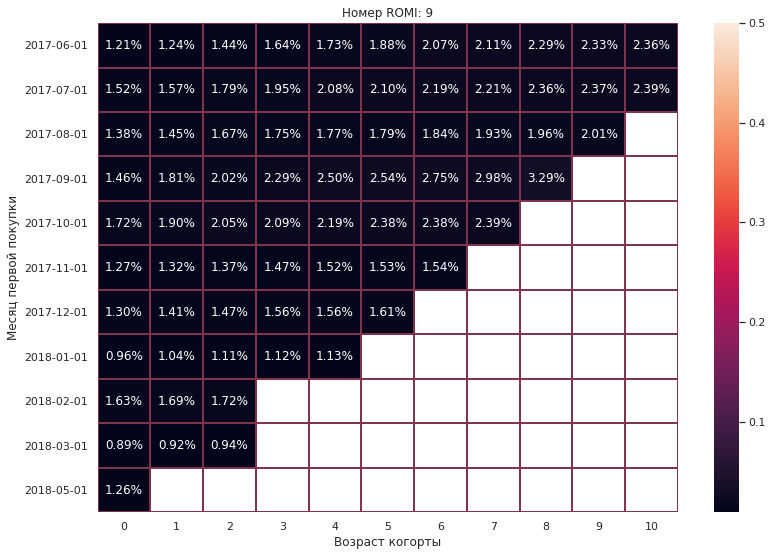

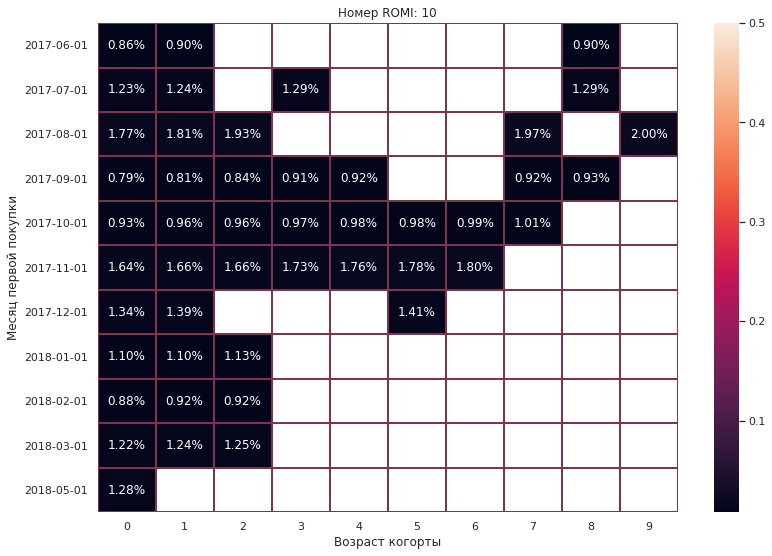

In [138]:
sourse = costs['source_id'].unique().astype(str)
for i in sourse:    
    visits_romi = visits.query('source_id == @i')
    orders_romi = buy.query('source_id == @i')
    first_orders_romi = orders_romi.groupby('uid').agg({'first_order_month': 'min'}).reset_index()
    first_orders_romi.columns = ['uid', 'first_order_M']
 
    cohort_sizes_romi = (
        first_orders_romi.groupby('first_order_M')
        .agg({'uid': 'nunique'})
        .reset_index()
    )
    cohort_sizes_romi.columns = ['first_order_M', 'n_buyers']
    cohort_sizes_romi.head()
    margin_rate = 1
 
    orders_first_month_romi = pd.merge(orders, first_orders_romi, on='uid')
    cohorts_romi = (
        orders_first_month_romi.groupby(['first_order_M', 'order_month'])
        .agg({'revenue': 'sum'})
        .reset_index()
    )
    
    report_romi = pd.merge(cohort_sizes_romi, cohorts_romi, on='first_order_M')
 
    report_romi['gp'] = report_romi['revenue'] * margin_rate
    report_romi['age'] = (
        report_romi['order_month'] - report_romi['first_order_M']
    ) / np.timedelta64(1, 'M')
    report_romi['age'] = report_romi['age'].round().astype('int')
 
    report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
 
    result_romi = report_romi.pivot_table(
        index='first_order_M', columns='age', values='ltv', aggfunc='mean'
    ).round().cumsum(axis=1)
 

    monthly_costs_romi = costs_.groupby('month').sum()
    report_new_romi = pd.merge(
        report_romi, monthly_costs_romi, left_on='first_order_M', right_on='month'
    )
    
    report_new_romi['cac'] = report_new_romi['costs'] / report_new_romi['n_buyers']
    cac = report_new_romi['cac'].mean()
    report_new_romi['romi'] = report_new_romi['ltv'] / cac
    report_new_romi['first_order_M'] = report_new_romi['first_order_M'].dt.strftime('%Y-%m-%d')

    
    output_romi = report_new_romi.pivot_table(
        index='first_order_M', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)

    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Номер ROMI: ' + i)
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц первой покупки')
    sns.heatmap(output_romi, annot=True, fmt='.2%', linewidths=1, linecolor= (0.5, 0.2, 0.3), vmax=0.5)
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц первой покупки')
    plt.show()


__Вывод__

Можем заметить, что 6, 7, 8 источников нет, следовательно они не окупаются.

### Вывод

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5621
Количество уникальных пользователей в месяц: 23228

В среднем пользователи заходят на сайт 987

Средняя продолжительность сессии:  643.5

В среднем проходит с момента первого посещения сайта до совершения покупки 16 дней

Каждый человек за месяц в среднем покупает 1.2 товара

Всего покупают за месяц в среднем 3878 раз

Средний чек за все время: 4.8 у.е.

Общая сумма расходов на маркетинг равна 329131.62

Наибольшие траты на рекламу у 3 источника (43%). Расходы на источники 2, 4, 5 примерно равны (2000 - 5500). Источники 1,9,10 
почти не расходуют бюджет компании.

CAC на одного покупателя для всего проекта равен 0,36

Наивысшая стоимость привлечения одного покупателя у источников 2 и 3

В ROMI не вошли 6, 7, 8 источники, следовательно они не окупаются.

#### Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;

Можем заметить, что компании делает ставку на 3 источник привлечения новых клиентов (43% трат на рекламу 3 источника). Но при этом, стоимость одого клиента равна 20 - 30 у.е., что намного больше остальных источников трафика. При этом ROMI показывает низкий для таких трат процент конверсии.

Я думаю, маркетологам стоит делать упор на такие источники, как 4, 1, 5 (в порядке значимости), т.к. при небольших затратах, компания получает достаточно много новых клиентов. Источник 4 имеет наивысший процент ROMI, при небольшой стоимости клиента, что делает его одним из перспективных направлений рекламной кампании.

#### Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

Количество уникальных пользователей в день: 907

Количество уникальных пользователей в неделю: 5621

Количество уникальных пользователей в месяц: 23228

В среднем пользователи заходят на сайт 987

Средняя продолжительность сессии:  643.5

Среднее значение Retention Rate за второй месяц жизни когорт равен 5.97%

В среднем проходит с момента первого посещения сайта до совершения покупки 1 минута

Каждый человек за месяц в среднем покупает 1.2 товара

Всего покупают за месяц в среднем 3878 раз

Средний чек за все время: 4.8 у.е.

Общая сумма расходов на маркетинг равна 329131.62 у.е.

Наибольшие траты на рекламу у 3 источника (43%). Расходы на источники 2, 4, 5 примерно равны (2000 - 5500). Источники 1,9,10 
почти не расходуют бюджет компании.

CAC на одного покупателя для всего проекта равен 0,36

Наивысшая стоимость привлечения одного покупателя у источников 2 и 3

В ROMI не вошли 6, 7, 8 источники, следовательно они не окупаются.

#### Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

Когорты 6, 11 и 12 месяцев 2017г. наиболее хорошо себя показывают на протяжении времени
На протяжении 6 месяцев наибольшее LTV принадлежит когорте 9 месяца 2017г. Ее LTV равен 13.01, что намного больше других когорт. Возможно маркетологи обновили рекламную кампанию.